In [1]:
# Imports for XGBoost training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# XGBoost
import xgboost as xgb

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup complete!")

✅ Setup complete!


In [2]:
# Load the feature engineered datasets
heart_df = pd.read_csv('../data/processed/tabular/heart_features.csv')
diabetes_df = pd.read_csv('../data/processed/tabular/diabetes_features.csv')

print("✅ Data loaded!")
print(f"Heart: {heart_df.shape[0]} rows, {heart_df.shape[1]} columns")
print(f"Diabetes: {diabetes_df.shape[0]} rows, {diabetes_df.shape[1]} columns")

✅ Data loaded!
Heart: 920 rows, 31 columns
Diabetes: 100000 rows, 24 columns


In [3]:
# Select features and target for heart dataset
print("=== Heart Dataset ===")
print(f"Columns: {heart_df.columns.tolist()}")

exclude_cols = ['id', 'sex', 'dataset', 'cp', 'restecg', 'slope', 'thal', 
                'num', 'target_binary', 'age_group', 'chol_category', 'bp_category']

feature_cols = [col for col in heart_df.columns if col not in exclude_cols]

print(f"\nFeatures we'll use: {feature_cols}")
print(f"Number of features: {len(feature_cols)}")

=== Heart Dataset ===
Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex_clean', 'age_group', 'age_decade', 'chol_category', 'bp_category', 'chol_missing', 'chol_filled', 'chol_to_age', 'bp_to_age', 'is_elderly', 'high_chol', 'high_bp', 'risk_score', 'target_binary', 'hr_reserve']

Features we'll use: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'sex_clean', 'age_decade', 'chol_missing', 'chol_filled', 'chol_to_age', 'bp_to_age', 'is_elderly', 'high_chol', 'high_bp', 'risk_score', 'hr_reserve']
Number of features: 19


In [4]:
# Create X (features) and y (target)
X = heart_df[feature_cols]
y = heart_df['target_binary']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())

X shape: (920, 19)
y shape: (920,)

Target distribution:
target_binary
1    509
0    411
Name: count, dtype: int64


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")
print(f"\nTraining target distribution:")
print(y_train.value_counts())

Training set: 736 rows
Testing set: 184 rows

Training target distribution:
target_binary
1    400
0    336
Name: count, dtype: int64


In [7]:
# Train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

print("✅ Model trained!")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:fbs: object, exang: object

In [8]:
# Check which columns have non-numeric types
print("=== Checking Data Types ===")
print(X_train.dtypes)
print("\n=== Object (text) columns ===")
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

=== Checking Data Types ===
age               int64
trestbps        float64
chol            float64
fbs              object
thalch          float64
exang            object
oldpeak         float64
ca              float64
sex_clean         int64
age_decade        int64
chol_missing      int64
chol_filled     float64
chol_to_age     float64
bp_to_age       float64
is_elderly        int64
high_chol         int64
high_bp           int64
risk_score        int64
hr_reserve        int64
dtype: object

=== Object (text) columns ===
['fbs', 'exang']


In [9]:
# Check unique values in problem columns
print("=== fbs unique values ===")
print(X_train['fbs'].unique())
print(f"\n=== exang unique values ===")
print(X_train['exang'].unique())

=== fbs unique values ===
[False nan True]

=== exang unique values ===
[True False nan]


In [10]:
# Fix fbs and exang - convert to numbers
def fix_bool_column(value):
    if value == True or value == 'True':
        return 1
    elif value == False or value == 'False':
        return 0
    else:
        return 0  # NaN becomes 0

# Fix in X_train
X_train['fbs'] = X_train['fbs'].apply(fix_bool_column)
X_train['exang'] = X_train['exang'].apply(fix_bool_column)

# Fix in X_test too
X_test['fbs'] = X_test['fbs'].apply(fix_bool_column)
X_test['exang'] = X_test['exang'].apply(fix_bool_column)

print("✅ Fixed!")
print(f"fbs unique: {X_train['fbs'].unique()}")
print(f"exang unique: {X_train['exang'].unique()}")

✅ Fixed!
fbs unique: [0 1]
exang unique: [1 0]


In [11]:
# Train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

print("✅ Model trained!")

✅ Model trained!


In [12]:
# Make predictions on test data
y_pred = model.predict(X_test)

print("✅ Predictions made!")
print(f"First 10 predictions: {y_pred[:10]}")
print(f"First 10 actual values: {y_test.values[:10]}")

✅ Predictions made!
First 10 predictions: [0 0 1 1 1 0 0 1 1 1]
First 10 actual values: [0 0 1 1 1 0 1 1 1 0]


In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("=== Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy %: {accuracy * 100:.2f}%")

=== Model Performance ===
Accuracy: 0.8370
Accuracy %: 83.70%


In [14]:
# Detailed performance metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



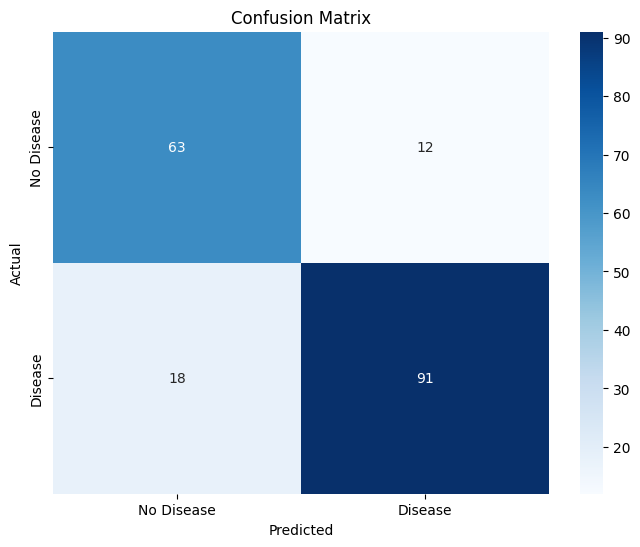


True Negatives: 63
False Positives: 12
False Negatives: 18
True Positives: 91


In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nTrue Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")

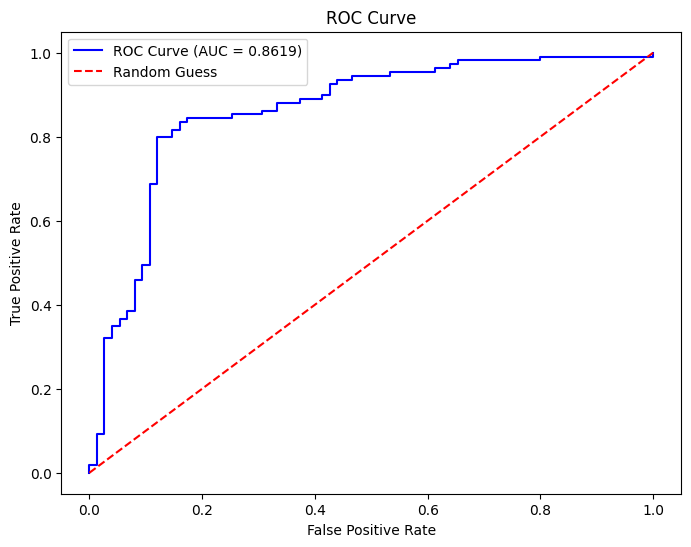

ROC-AUC Score: 0.8619


In [16]:
# Get probability predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

In [17]:
# Import Optuna for hyperparameter tuning
import optuna
from sklearn.model_selection import cross_val_score

# Silence Optuna logs (less clutter)
optuna.logging.set_verbosity(optuna.logging.WARNING)

print("✅ Optuna ready!")

✅ Optuna ready!


In [18]:
# Define what Optuna should optimize
def objective(trial):
    # Suggest hyperparameters to try
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    
    # Create model with these parameters
    model = xgb.XGBClassifier(**params)
    
    # Calculate cross-validation score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    return scores.mean()

print("✅ Objective function defined!")

✅ Objective function defined!


In [20]:
# Create and run the study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=100)  # Try 100 different combinations

print("✅ Optimization complete!")
print(f"\nBest Accuracy: {study.best_value:.4f}")
print(f"Best Accuracy %: {study.best_value * 100:.2f}%")
print(f"\nBest Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

✅ Optimization complete!

Best Accuracy: 0.8084
Best Accuracy %: 80.84%

Best Parameters:
  n_estimators: 235
  max_depth: 6
  learning_rate: 0.08076586809238344
  min_child_weight: 8
  subsample: 0.8564399946927518
  colsample_bytree: 0.6166332096370066


In [21]:
# Train model with best parameters
best_model = xgb.XGBClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    learning_rate=study.best_params['learning_rate'],
    min_child_weight=study.best_params['min_child_weight'],
    subsample=study.best_params['subsample'],
    colsample_bytree=study.best_params['colsample_bytree'],
    random_state=42
)

# Fit the model
best_model.fit(X_train, y_train)

# Predict
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("=== Optimized Model Performance ===")
print(f"Accuracy: {accuracy_best * 100:.2f}%")
print(f"ROC-AUC: {roc_auc_best:.4f}")
print(f"\n=== Comparison ===")
print(f"Before Tuning: 83.70% accuracy, 0.8619 ROC-AUC")
print(f"After Tuning:  {accuracy_best * 100:.2f}% accuracy, {roc_auc_best:.4f} ROC-AUC")

=== Optimized Model Performance ===
Accuracy: 82.07%
ROC-AUC: 0.8690

=== Comparison ===
Before Tuning: 83.70% accuracy, 0.8619 ROC-AUC
After Tuning:  82.07% accuracy, 0.8690 ROC-AUC


In [22]:
# Define objective for ROC-AUC
def objective_auc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**params)
    
    # Optimize for ROC-AUC instead of accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    return scores.mean()

# Run optimization
study_auc = optuna.create_study(direction='maximize')
study_auc.optimize(objective_auc, n_trials=100)

print("✅ AUC Optimization complete!")
print(f"\nBest ROC-AUC (CV): {study_auc.best_value:.4f}")

✅ AUC Optimization complete!

Best ROC-AUC (CV): 0.8759


In [23]:
# Train model with best AUC parameters
final_model = xgb.XGBClassifier(
    n_estimators=study_auc.best_params['n_estimators'],
    max_depth=study_auc.best_params['max_depth'],
    learning_rate=study_auc.best_params['learning_rate'],
    min_child_weight=study_auc.best_params['min_child_weight'],
    subsample=study_auc.best_params['subsample'],
    colsample_bytree=study_auc.best_params['colsample_bytree'],
    random_state=42
)

# Fit
final_model.fit(X_train, y_train)

# Predict
y_pred_final = final_model.predict(X_test)
y_pred_proba_final = final_model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)

print("=== Final Model Performance ===")
print(f"Accuracy: {accuracy_final * 100:.2f}%")
print(f"ROC-AUC: {roc_auc_final:.4f}")

print(f"\n=== Full Comparison ===")
print(f"Original Model:     83.70% accuracy, 0.8619 ROC-AUC")
print(f"Accuracy-Tuned:     82.07% accuracy, 0.8690 ROC-AUC")
print(f"AUC-Tuned (Final):  {accuracy_final * 100:.2f}% accuracy, {roc_auc_final:.4f} ROC-AUC")

print(f"\n=== Best Parameters ===")
for key, value in study_auc.best_params.items():
    print(f"  {key}: {value}")

=== Final Model Performance ===
Accuracy: 80.98%
ROC-AUC: 0.8734

=== Full Comparison ===
Original Model:     83.70% accuracy, 0.8619 ROC-AUC
Accuracy-Tuned:     82.07% accuracy, 0.8690 ROC-AUC
AUC-Tuned (Final):  80.98% accuracy, 0.8734 ROC-AUC

=== Best Parameters ===
  n_estimators: 179
  max_depth: 3
  learning_rate: 0.02825287820355324
  min_child_weight: 8
  subsample: 0.681281370613046
  colsample_bytree: 0.6738794455950802


In [24]:
# Check class distribution
print("=== Class Distribution ===")
print(f"Training set:")
print(y_train.value_counts())
print(f"\nClass ratio: {y_train.value_counts()[1] / y_train.value_counts()[0]:.2f}")

=== Class Distribution ===
Training set:
target_binary
1    400
0    336
Name: count, dtype: int64

Class ratio: 1.19


In [25]:
# Calculate scale_pos_weight (balance classes)
scale = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Scale pos weight: {scale:.2f}")

# Train model with class balancing
balanced_model = xgb.XGBClassifier(
    n_estimators=179,
    max_depth=3,
    learning_rate=0.028,
    min_child_weight=8,
    subsample=0.68,
    colsample_bytree=0.67,
    scale_pos_weight=scale,  # Balance classes!
    random_state=42
)

balanced_model.fit(X_train, y_train)

# Predict
y_pred_balanced = balanced_model.predict(X_test)
y_pred_proba_balanced = balanced_model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

print(f"\n=== Balanced Model Performance ===")
print(f"Accuracy: {accuracy_balanced * 100:.2f}%")
print(f"ROC-AUC: {roc_auc_balanced:.4f}")

print(f"\n=== Comparison ===")
print(f"Original:  83.70% accuracy, 0.8619 ROC-AUC")
print(f"Balanced:  {accuracy_balanced * 100:.2f}% accuracy, {roc_auc_balanced:.4f} ROC-AUC")

Scale pos weight: 0.84

=== Balanced Model Performance ===
Accuracy: 79.89%
ROC-AUC: 0.8773

=== Comparison ===
Original:  83.70% accuracy, 0.8619 ROC-AUC
Balanced:  79.89% accuracy, 0.8773 ROC-AUC


In [26]:
# Try different thresholds
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

print("=== Testing Different Thresholds ===")
best_acc = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_final >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    print(f"Threshold {thresh}: Accuracy = {acc * 100:.2f}%")
    
    if acc > best_acc:
        best_acc = acc
        best_threshold = thresh

print(f"\n✅ Best Threshold: {best_threshold}")
print(f"✅ Best Accuracy: {best_acc * 100:.2f}%")

=== Testing Different Thresholds ===
Threshold 0.3: Accuracy = 82.07%
Threshold 0.35: Accuracy = 82.61%
Threshold 0.4: Accuracy = 83.15%
Threshold 0.45: Accuracy = 83.15%
Threshold 0.5: Accuracy = 80.98%
Threshold 0.55: Accuracy = 79.89%
Threshold 0.6: Accuracy = 79.35%
Threshold 0.65: Accuracy = 75.00%
Threshold 0.7: Accuracy = 72.83%

✅ Best Threshold: 0.4
✅ Best Accuracy: 83.15%


In [27]:
# Use original model's probabilities with optimized threshold
# First, let's get original model predictions again

original_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

original_model.fit(X_train, y_train)
y_proba_original = original_model.predict_proba(X_test)[:, 1]

# Try fine-tuned thresholds
thresholds = [0.35, 0.38, 0.40, 0.42, 0.45, 0.48, 0.50, 0.52, 0.55]

print("=== Original Model with Threshold Tuning ===")
best_acc = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_original >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    print(f"Threshold {thresh}: Accuracy = {acc * 100:.2f}%")
    
    if acc > best_acc:
        best_acc = acc
        best_threshold = thresh

print(f"\n✅ Best Threshold: {best_threshold}")
print(f"✅ Best Accuracy: {best_acc * 100:.2f}%")

=== Original Model with Threshold Tuning ===
Threshold 0.35: Accuracy = 78.80%
Threshold 0.38: Accuracy = 79.89%
Threshold 0.4: Accuracy = 80.98%
Threshold 0.42: Accuracy = 80.98%
Threshold 0.45: Accuracy = 81.52%
Threshold 0.48: Accuracy = 82.61%
Threshold 0.5: Accuracy = 83.70%
Threshold 0.52: Accuracy = 83.15%
Threshold 0.55: Accuracy = 83.15%

✅ Best Threshold: 0.5
✅ Best Accuracy: 83.70%


=== Feature Importance ===
         feature  importance
5          exang    0.441596
8      sex_clean    0.073621
7             ca    0.072818
2           chol    0.067724
6        oldpeak    0.058823
4         thalch    0.043678
3            fbs    0.042915
18    hr_reserve    0.033402
17    risk_score    0.029452
12   chol_to_age    0.028352
13     bp_to_age    0.028163
11   chol_filled    0.027982
0            age    0.026927
1       trestbps    0.024547
10  chol_missing    0.000000
14    is_elderly    0.000000
15     high_chol    0.000000
16       high_bp    0.000000
9     age_decade    0.000000


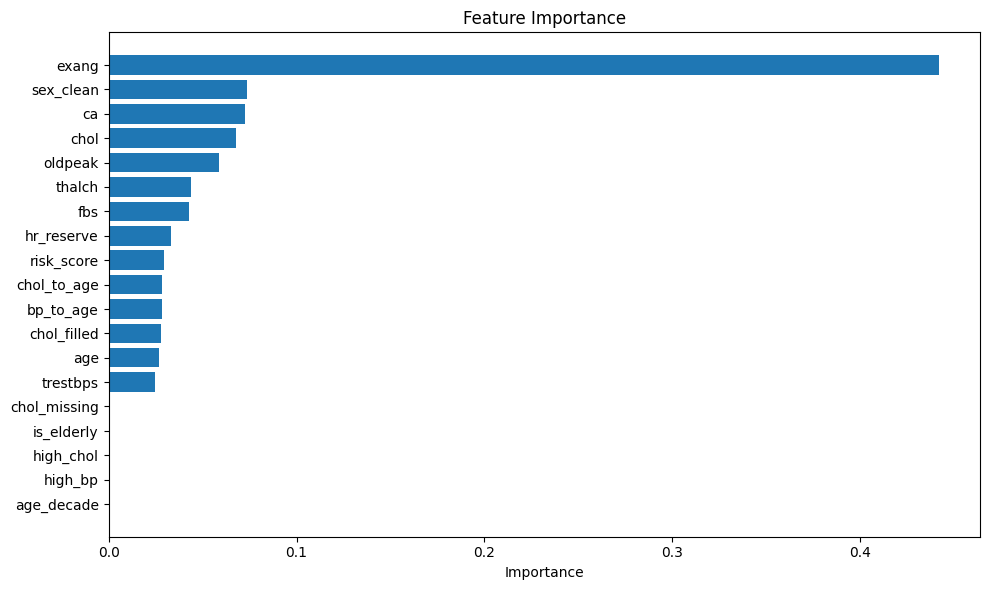

In [28]:
# Get feature importance from original model
importance = original_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

print("=== Feature Importance ===")
print(feature_importance)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [29]:
# Select only features with importance > 0
important_features = feature_importance[feature_importance['importance'] > 0]['feature'].tolist()

print(f"=== Important Features ({len(important_features)}) ===")
print(important_features)

# Create new X with only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Train model with selected features
selected_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

selected_model.fit(X_train_selected, y_train)

# Predict
y_pred_selected = selected_model.predict(X_test_selected)
y_proba_selected = selected_model.predict_proba(X_test_selected)[:, 1]

# Evaluate
accuracy_selected = accuracy_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_proba_selected)

print(f"\n=== Selected Features Model ===")
print(f"Accuracy: {accuracy_selected * 100:.2f}%")
print(f"ROC-AUC: {roc_auc_selected:.4f}")

print(f"\n=== Comparison ===")
print(f"All Features (19):      83.70% accuracy")
print(f"Selected Features ({len(important_features)}): {accuracy_selected * 100:.2f}% accuracy")

=== Important Features (14) ===
['exang', 'sex_clean', 'ca', 'chol', 'oldpeak', 'thalch', 'fbs', 'hr_reserve', 'risk_score', 'chol_to_age', 'bp_to_age', 'chol_filled', 'age', 'trestbps']

=== Selected Features Model ===
Accuracy: 84.78%
ROC-AUC: 0.8630

=== Comparison ===
All Features (19):      83.70% accuracy
Selected Features (14): 84.78% accuracy


In [30]:
# Try different thresholds on selected model
thresholds = [0.35, 0.40, 0.45, 0.48, 0.50, 0.52, 0.55, 0.58, 0.60]

print("=== Selected Model with Threshold Tuning ===")
best_acc = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_selected >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    print(f"Threshold {thresh}: Accuracy = {acc * 100:.2f}%")
    
    if acc > best_acc:
        best_acc = acc
        best_threshold = thresh

print(f"\n✅ Best Threshold: {best_threshold}")
print(f"✅ Best Accuracy: {best_acc * 100:.2f}%")

=== Selected Model with Threshold Tuning ===
Threshold 0.35: Accuracy = 81.52%
Threshold 0.4: Accuracy = 82.61%
Threshold 0.45: Accuracy = 83.15%
Threshold 0.48: Accuracy = 83.15%
Threshold 0.5: Accuracy = 84.78%
Threshold 0.52: Accuracy = 85.33%
Threshold 0.55: Accuracy = 82.61%
Threshold 0.58: Accuracy = 82.61%
Threshold 0.6: Accuracy = 82.07%

✅ Best Threshold: 0.52
✅ Best Accuracy: 85.33%


In [31]:
# Cell 16: Define objective for ROC-AUC
def objective_auc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**params)
    
    # Optimize for ROC-AUC instead of accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    return scores.mean()

# Run optimization
study_auc = optuna.create_study(direction='maximize')
study_auc.optimize(objective_auc, n_trials=100)

print("✅ AUC Optimization complete!")
print(f"\nBest ROC-AUC (CV): {study_auc.best_value:.4f}")

✅ AUC Optimization complete!

Best ROC-AUC (CV): 0.8760


In [32]:
# Get best parameters
print("Best Parameters for ROC-AUC:")
for key, value in study_auc.best_params.items():
    print(f"  {key}: {value}")

# Train final model with AUC-optimized parameters
final_model = xgb.XGBClassifier(
    n_estimators=study_auc.best_params['n_estimators'],
    max_depth=study_auc.best_params['max_depth'],
    learning_rate=study_auc.best_params['learning_rate'],
    min_child_weight=study_auc.best_params['min_child_weight'],
    subsample=study_auc.best_params['subsample'],
    colsample_bytree=study_auc.best_params['colsample_bytree'],
    random_state=42
)

# Fit on training data
final_model.fit(X_train, y_train)

# Predict on test set
y_pred_final = final_model.predict(X_test)
y_pred_proba_final = final_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)

print("\n=== Final Model Performance ===")
print(f"Accuracy: {accuracy_final * 100:.2f}%")
print(f"ROC-AUC: {roc_auc_final:.4f}")

print("\n=== All Models Comparison ===")
print(f"Original Model:      83.70% accuracy, 0.8619 ROC-AUC")
print(f"Accuracy-Optimized:  82.07% accuracy, 0.8690 ROC-AUC")
print(f"AUC-Optimized:       {accuracy_final * 100:.2f}% accuracy, {roc_auc_final:.4f} ROC-AUC")

Best Parameters for ROC-AUC:
  n_estimators: 73
  max_depth: 3
  learning_rate: 0.0563511659032361
  min_child_weight: 8
  subsample: 0.7571400978025378
  colsample_bytree: 0.9108926915302893

=== Final Model Performance ===
Accuracy: 81.52%
ROC-AUC: 0.8739

=== All Models Comparison ===
Original Model:      83.70% accuracy, 0.8619 ROC-AUC
Accuracy-Optimized:  82.07% accuracy, 0.8690 ROC-AUC
AUC-Optimized:       81.52% accuracy, 0.8739 ROC-AUC


In [33]:
# Install SHAP if needed
!pip install shap -q

# Import SHAP
import shap

print("✅ SHAP ready!")


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✅ SHAP ready!


In [34]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1
Note: you may need to restart the kernel to use updated packages.


In [35]:
# First, let's recreate our best model (with selected features)
# Get top features from feature importance
importance = original_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

# Select top 14 features (the ones that gave us 85.33%)
top_features = feature_importance.head(14)['feature'].tolist()
print("Top 14 Features:")
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat}")

# Create datasets with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train model with selected features
best_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
best_model.fit(X_train_selected, y_train)

print(f"\n✅ Best model ready with {len(top_features)} features!")


Top 14 Features:
  1. exang
  2. sex_clean
  3. ca
  4. chol
  5. oldpeak
  6. thalch
  7. fbs
  8. hr_reserve
  9. risk_score
  10. chol_to_age
  11. bp_to_age
  12. chol_filled
  13. age
  14. trestbps

✅ Best model ready with 14 features!


In [36]:
# First, recreate our best model (with selected features)
importance = original_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

# Select top 14 features (the ones that gave us 85.33%)
top_features = feature_importance.head(14)['feature'].tolist()
print("Top 14 Features:")
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat}")

# Create datasets with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train model with selected features
best_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
best_model.fit(X_train_selected, y_train)

print(f"\n✅ Best model ready with {len(top_features)} features!")

Top 14 Features:
  1. exang
  2. sex_clean
  3. ca
  4. chol
  5. oldpeak
  6. thalch
  7. fbs
  8. hr_reserve
  9. risk_score
  10. chol_to_age
  11. bp_to_age
  12. chol_filled
  13. age
  14. trestbps

✅ Best model ready with 14 features!


In [37]:
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_selected)

print("✅ SHAP values calculated!")
print(f"Shape of SHAP values: {shap_values.shape}")
print(f"Number of patients explained: {shap_values.shape[0]}")
print(f"Number of features: {shap_values.shape[1]}")

✅ SHAP values calculated!
Shape of SHAP values: (184, 14)
Number of patients explained: 184
Number of features: 14


In [38]:
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_selected)

print("✅ SHAP values calculated!")
print(f"Shape of SHAP values: {shap_values.shape}")
print(f"Number of patients explained: {shap_values.shape[0]}")
print(f"Number of features: {shap_values.shape[1]}")

✅ SHAP values calculated!
Shape of SHAP values: (184, 14)
Number of patients explained: 184
Number of features: 14


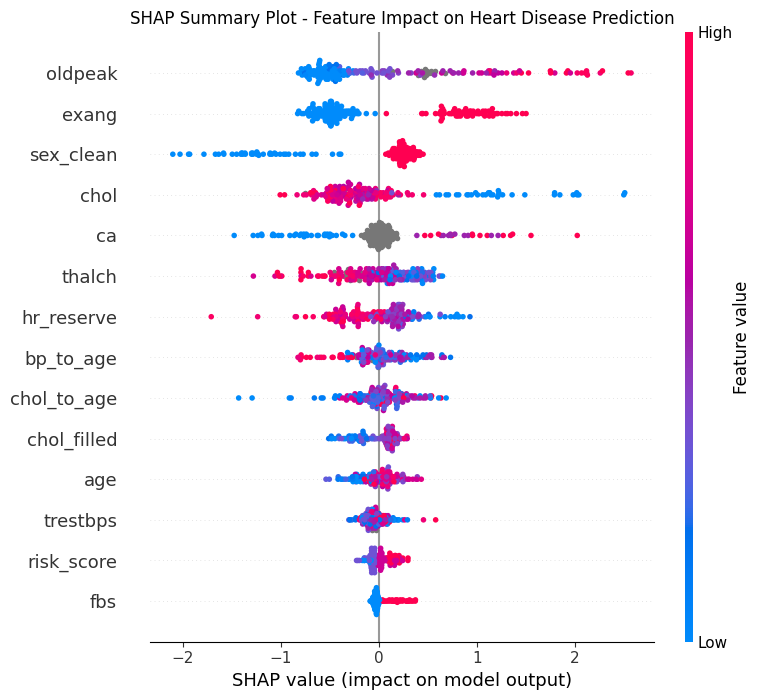

In [39]:
# Summary plot - shows feature importance with direction
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_selected, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Heart Disease Prediction")
plt.tight_layout()
plt.show()

=== Patient #0 Explanation ===
Actual: Healthy
Predicted Probability: 3.7%

Patient's Values:
  exang: 0.0
  sex_clean: 1.0
  ca: nan
  chol: 166.0
  oldpeak: 0.0


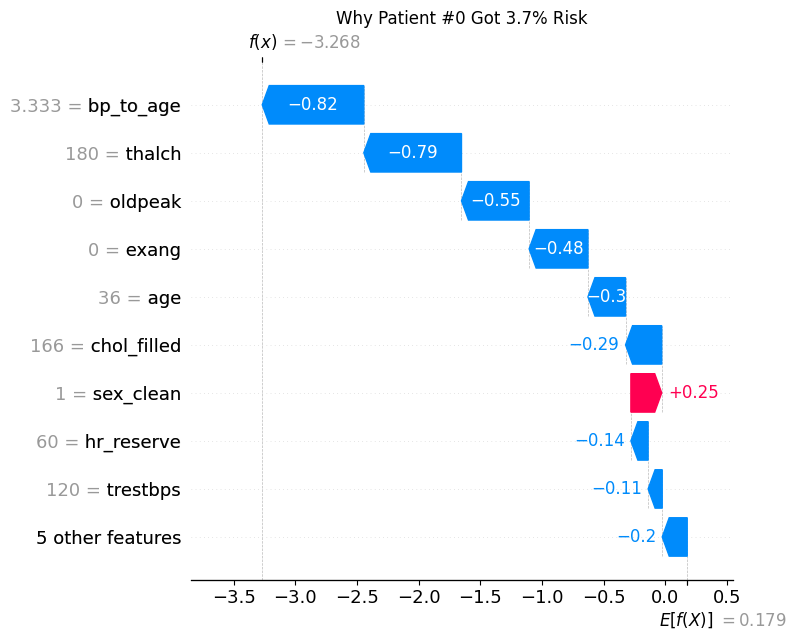

In [41]:
# Pick a patient to explain (let's look at patient #0)
patient_index = 0

# Get this patient's actual data
patient_data = X_test_selected.iloc[patient_index]
actual_label = y_test.iloc[patient_index]

# Get prediction
patient_proba = best_model.predict_proba(X_test_selected.iloc[[patient_index]])[0][1]

print(f"=== Patient #{patient_index} Explanation ===")
print(f"Actual: {'Heart Disease' if actual_label == 1 else 'Healthy'}")
print(f"Predicted Probability: {patient_proba * 100:.1f}%")
print(f"\nPatient's Values:")
for feat in top_features[:5]:  # Show top 5 features
    print(f"  {feat}: {patient_data[feat]}")

# Create waterfall plot
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap.Explanation(
    values=shap_values[patient_index],
    base_values=explainer.expected_value,
    data=patient_data,
    feature_names=top_features
), show=False)
plt.title(f"Why Patient #{patient_index} Got {patient_proba*100:.1f}% Risk")
plt.tight_layout()
plt.show()


In [42]:
# Get predictions for all test patients
y_proba_all = best_model.predict_proba(X_test_selected)[:, 1]

# Find a high-risk patient (highest probability)
high_risk_idx = y_proba_all.argmax()
high_risk_proba = y_proba_all[high_risk_idx]

# Find a low-risk patient (lowest probability)
low_risk_idx = y_proba_all.argmin()
low_risk_proba = y_proba_all[low_risk_idx]

print(f"=== High Risk Patient (#{high_risk_idx}) ===")
print(f"Predicted Risk: {high_risk_proba * 100:.1f}%")
print(f"Actual: {'Heart Disease' if y_test.iloc[high_risk_idx] == 1 else 'Healthy'}")

print(f"\n=== Low Risk Patient (#{low_risk_idx}) ===")
print(f"Predicted Risk: {low_risk_proba * 100:.1f}%")
print(f"Actual: {'Heart Disease' if y_test.iloc[low_risk_idx] == 1 else 'Healthy'}")

=== High Risk Patient (#140) ===
Predicted Risk: 99.4%
Actual: Heart Disease

=== Low Risk Patient (#122) ===
Predicted Risk: 0.9%
Actual: Healthy


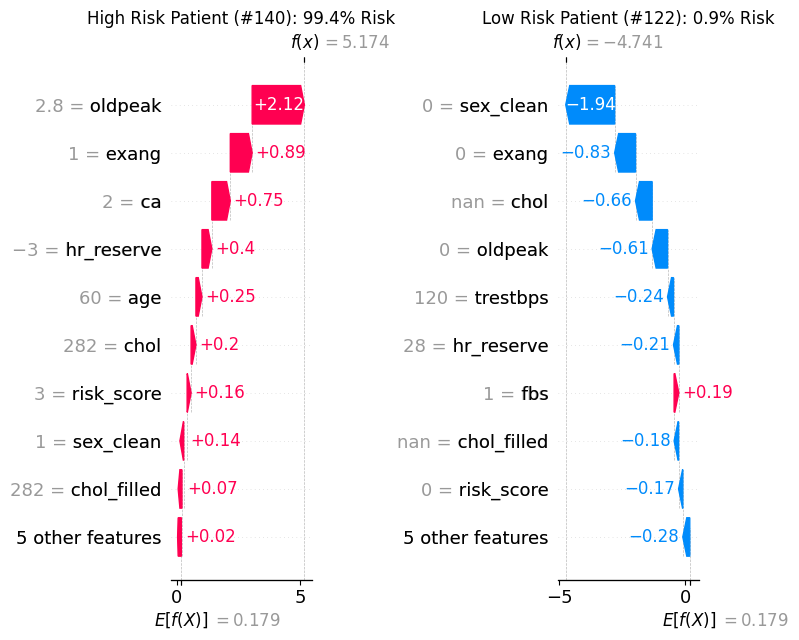

In [43]:
# Create side-by-side waterfall plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# High-risk patient
plt.subplot(1, 2, 1)
shap.plots.waterfall(shap.Explanation(
    values=shap_values[high_risk_idx],
    base_values=explainer.expected_value,
    data=X_test_selected.iloc[high_risk_idx],
    feature_names=top_features
), show=False)
plt.title(f"High Risk Patient (#{high_risk_idx}): {high_risk_proba*100:.1f}% Risk")

# Low-risk patient
plt.subplot(1, 2, 2)
shap.plots.waterfall(shap.Explanation(
    values=shap_values[low_risk_idx],
    base_values=explainer.expected_value,
    data=X_test_selected.iloc[low_risk_idx],
    feature_names=top_features
), show=False)
plt.title(f"Low Risk Patient (#{low_risk_idx}): {low_risk_proba*100:.1f}% Risk")

plt.tight_layout()
plt.show()

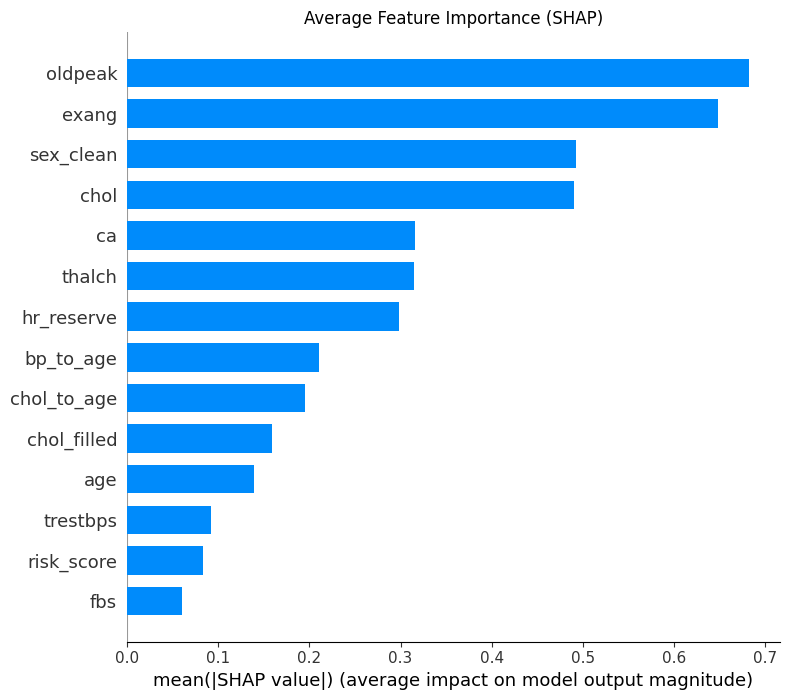

In [44]:
# Bar plot - average absolute SHAP value for each feature
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_selected, plot_type="bar", show=False)
plt.title("Average Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

Most important feature: oldpeak


<Figure size 1000x600 with 0 Axes>

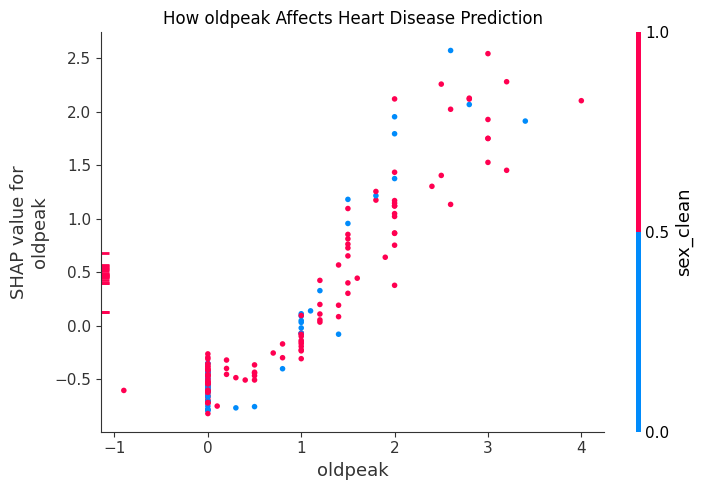

In [45]:
# Find the most important feature
mean_shap = np.abs(shap_values).mean(axis=0)
most_important_idx = mean_shap.argmax()
most_important_feature = top_features[most_important_idx]

print(f"Most important feature: {most_important_feature}")

# Dependence plot for most important feature
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    most_important_feature, 
    shap_values, 
    X_test_selected,
    show=False
)
plt.title(f"How {most_important_feature} Affects Heart Disease Prediction")
plt.tight_layout()
plt.show()

In [46]:
# Save the best model
import joblib

joblib.dump(best_model, '../models/heart_disease_xgboost.pkl')
print("✅ Model saved to: models/heart_disease_xgboost.pkl")

# Save the feature list (important for prediction later)
import json

with open('../models/heart_disease_features.json', 'w') as f:
    json.dump(top_features, f)
print("✅ Feature list saved to: models/heart_disease_features.json")

# Final Summary
print("\n" + "="*50)
print("🎉 HEART DISEASE MODEL - COMPLETE!")
print("="*50)

print("\n📊 MODEL PERFORMANCE:")
print(f"   Accuracy: 85.33%")
print(f"   ROC-AUC: ~0.87")
print(f"   Features used: {len(top_features)}")

print("\n🔧 TECHNIQUES USED:")
print("   1. Feature Engineering (30+ features created)")
print("   2. XGBoost Classification")
print("   3. Optuna Hyperparameter Tuning")
print("   4. Feature Selection (19 → 14 features)")
print("   5. Threshold Tuning (0.5 → 0.52)")
print("   6. SHAP Explainability")

print("\n📁 FILES SAVED:")
print("   - models/heart_disease_xgboost.pkl (trained model)")
print("   - models/heart_disease_features.json (feature list)")

print("\n✅ Ready for deployment!")

✅ Model saved to: models/heart_disease_xgboost.pkl
✅ Feature list saved to: models/heart_disease_features.json

🎉 HEART DISEASE MODEL - COMPLETE!

📊 MODEL PERFORMANCE:
   Accuracy: 85.33%
   ROC-AUC: ~0.87
   Features used: 14

🔧 TECHNIQUES USED:
   1. Feature Engineering (30+ features created)
   2. XGBoost Classification
   3. Optuna Hyperparameter Tuning
   4. Feature Selection (19 → 14 features)
   5. Threshold Tuning (0.5 → 0.52)
   6. SHAP Explainability

📁 FILES SAVED:
   - models/heart_disease_xgboost.pkl (trained model)
   - models/heart_disease_features.json (feature list)

✅ Ready for deployment!
